In [1]:
import os
import zipfile
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf

In [3]:
# current_dir = "cat_dog_classification"
# with zipfile.ZipFile(f"../{current_dir}/train.zip","r") as z:
#     z.extractall(".")
    
# with zipfile.ZipFile(f"../{current_dir}/test1.zip","r") as z:
#     z.extractall(".")

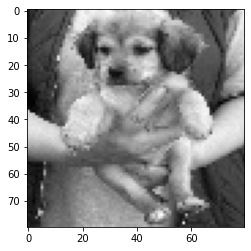

In [4]:
# main_dir = os.getcwd()
# train_dir = "train/"
# path = os.path.join(main_dir,train_dir)

# for p in os.listdir(path):
#     category = p.split(".")[0]
#     img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
#     new_img_array = cv2.resize(img_array, dsize=(80, 80))
#     plt.imshow(new_img_array,cmap="gray")
#     break

In [5]:
# X = []
# y = []
# convert = lambda category: int(category == 'dog')

# def create_test_data(path):
#     for p in os.listdir(path):
#         category = p.split(".")[0]
#         category = convert(category)
        
#         img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
#         new_img_array = cv2.resize(img_array, dsize=(80, 80))
        
#         X.append(new_img_array)
#         y.append(category)

In [6]:
# create_test_data(path)

In [7]:
# X = np.array(X).reshape(-1, 80, 80, 1)
# y = np.array(y)

In [8]:
# X.shape, y.shape

((25000, 80, 80, 1), (25000,))

In [10]:
# pickle.dump(X, open('pickle_data/train_x.pkl', 'wb'))
# pickle.dump(y, open('pickle_data/train_y.pkl', 'wb'))

In [11]:
X = pickle.load(open('pickle_data/train_x.pkl', 'rb'))
y = pickle.load(open('pickle_data/train_y.pkl', 'rb'))

In [10]:
X.shape, y.shape

((25000, 80, 80, 1), (25000,))

In [12]:
#Normalize data
X = X/255.0

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Metal device set to: Apple M1


2022-04-06 15:53:06.001526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-06 15:53:06.002023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2022-04-06 15:53:10.254844: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-06 15:53:10.532769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


624/625 [============================>.] - ETA: 0s - loss: 0.6408 - accuracy: 0.6258

2022-04-06 15:53:37.605422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 29s 42ms/step - loss: 0.6409 - accuracy: 0.6259 - val_loss: 0.5566 - val_accuracy: 0.7204
Epoch 2/10
625/625 [==============================] - 26s 41ms/step - loss: 0.5353 - accuracy: 0.7320 - val_loss: 0.5119 - val_accuracy: 0.7460
Epoch 3/10
625/625 [==============================] - 26s 41ms/step - loss: 0.4751 - accuracy: 0.7714 - val_loss: 0.4733 - val_accuracy: 0.7744
Epoch 4/10
625/625 [==============================] - 26s 41ms/step - loss: 0.4218 - accuracy: 0.8069 - val_loss: 0.4810 - val_accuracy: 0.7664
Epoch 5/10
625/625 [==============================] - 26s 41ms/step - loss: 0.3760 - accuracy: 0.8291 - val_loss: 0.4670 - val_accuracy: 0.7864
Epoch 6/10
625/625 [==============================] - 26s 41ms/step - loss: 0.3220 - accuracy: 0.8610 - val_loss: 0.4955 - val_accuracy: 0.7772
Epoch 7/10
625/625 [==============================] - 26s 41ms/step - loss: 0.2657 - accuracy: 0.8865 - val_loss: 0.5008 - val_accuracy: 0.7840
Epo

<AxesSubplot:>

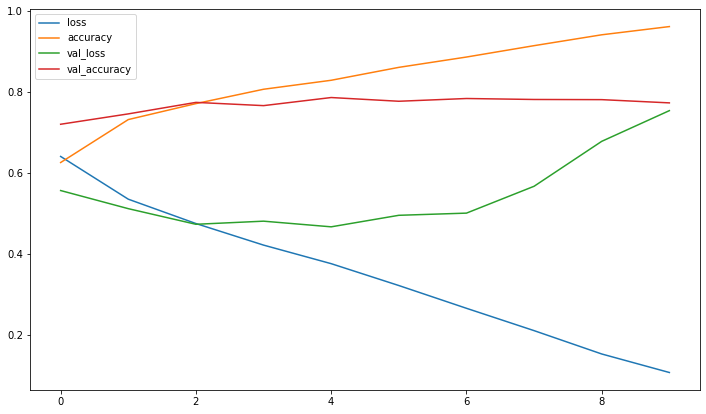

In [15]:
pd.DataFrame(history.history).plot(figsize=(12, 7))

In [16]:
test_dir = "test1"
path = os.path.join(main_dir,test_dir)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [17]:
predictions = model.predict(X_test)

2022-04-06 15:59:20.533508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [18]:
predicted_val = [int(round(p[0])) for p in predictions]

In [19]:
predicted_val

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
